In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
%run -i ./ownlib/PHT-Library.ipynb

In [3]:
# Import images
ori_img = cv2.imread('./assets/lena.png', 0)
ori_logo = cv2.imread('./assets/squares.png', 0)

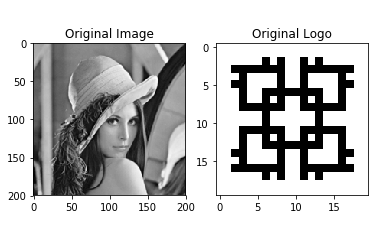

In [4]:
N = 200 # Image Size
G = 20 # Watermark Size

P = 2 * G
T_STEP = int(P / 4) + 1
I_STEP = int(N / 8) + 1

# Preprocess Image
IMG = cv2.resize(ori_img, (N, N))

# Preprocess Logo
LOGO = cv2.resize(ori_logo, (G,G))
LOGO = (LOGO >= 128) * 1

# Show Image and Logo
imshow2(IMG, LOGO, 'Original Image', 'Original Logo')

Progress: [####################] 100.0%


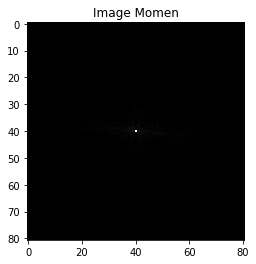

In [5]:
# Calculate Momen of Original Image
MOMEN = transformPHT(IMG, N, P)
imshow(MOMEN, 'Image Momen')

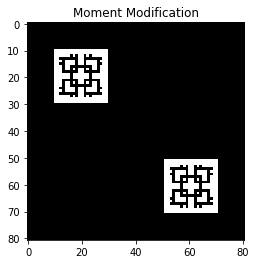

In [20]:
DELTA = 0.5 # Watermarking Power

# Current Binary Value
matQ = np.floor(np.abs(MOMEN) / DELTA) % 2

# Set Watermark Position
logo_position = np.index_exp[P+1+int(G/2):P+1+int(3*G/2), P+1+int(G/2):P+1+int(3*G/2)]

# Watermark Matrix
P2 = P * 2 + 1
doubleLogo = np.zeros((P2, P2))
doubleLogo[logo_position] = LOGO
doubleLogo = doubleLogo + np.rot90(np.rot90(doubleLogo))

# Watermark Filter matrix
doubleLogoFilter = np.zeros((P2, P2))
doubleLogoFilter[logo_position] = 1
doubleLogoFilter = doubleLogoFilter + np.rot90(np.rot90(doubleLogoFilter))
        
# Modified Momen
OMEGA = DELTA * ((doubleLogo != matQ)) / np.abs(MOMEN) * MOMEN
OMEGA = OMEGA * doubleLogoFilter

# Show Modified Momen
imshow(OMEGA, 'Moment Modification')

Progress: [####################] 100.0%


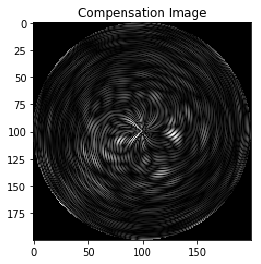

In [7]:
# Calculate Compensation Image
EPSILON = inversePHT(OMEGA, N, P)
imshow(EPSILON, 'Compensation Image')

In [21]:
def processAttack(IMG_MODIFIED, SIZE=N):
    
    # Calculate Momen
    MOMEN_MODIFIED = transformPHT(IMG_MODIFIED, SIZE, P)
    
    # Current Binary Value & Difference
    MAT_Q_MODIFIED = np.floor(np.abs(MOMEN_MODIFIED) / DELTA) % 2
    
    # Crop Watermark
    LOGO_MODIFIED = MAT_Q_MODIFIED[logo_position]
    
    # Calculate Bit Error Rate    
    BE = calcBE(LOGO, LOGO_MODIFIED)
    BER = BE / (G * G)
    
    return (LOGO_MODIFIED, BE, BER)

Progress: [####################] 100.0%


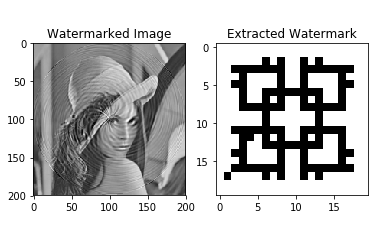

BE  :  3.0
BER :  0.75%


In [11]:
# Add Compensation Image to Original Image
IMG_WATERMARKED = IMG + EPSILON

(C_DIFF_WATERMARKED, BE_WATERMARKED, BER_WATERMARKED) = processAttack(IMG_WATERMARKED)

# Show Container
imshow2(IMG_WATERMARKED, C_DIFF_WATERMARKED, 'Watermarked Image', 'Extracted Watermark')

# Show Bit Error Rate
print('BE  : ', BE_WATERMARKED)
print('BER : ', '{:.2%}'.format(BER_WATERMARKED))

Progress: [####################] 100.0%


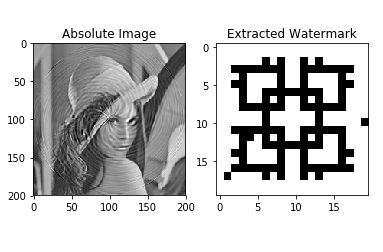

BE  :  4.0
BER :  1.00%


In [12]:
# Attack: Change Complex into Real Number
IMG_REAL = np.abs(IMG_WATERMARKED)

(C_DIFF_REAL, BE_REAL, BER_REAL) = processAttack(IMG_REAL)

# Show Container
imshow2(IMG_REAL, C_DIFF_REAL, 'Absolute Image', 'Extracted Watermark')

# Show Bit Error Rate
print('BE  : ', BE_REAL)
print('BER : ', '{:.2%}'.format(BER_REAL))

Progress: [####################] 100.0%


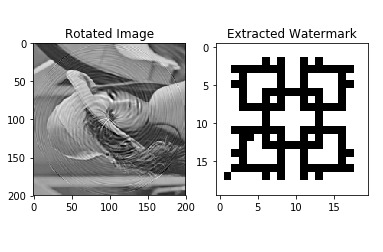

BE  :  3.0
BER :  0.75%


In [13]:
# Attack: Rotation 90 degree
IMG_ROTATE = np.rot90(IMG_WATERMARKED)

(C_DIFF_ROTATE, BE_ROTATE, BER_ROTATE) = processAttack(IMG_ROTATE)

# Show Container
imshow2(IMG_ROTATE, C_DIFF_ROTATE, 'Rotated Image', 'Extracted Watermark')

# Show Bit Error Rate
print('BE  : ', BE_ROTATE)
print('BER : ', '{:.2%}'.format(BER_ROTATE))

In [ ]:
TEST = 

Progress: [####################] 100.0%


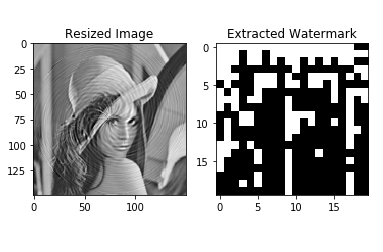

BE  :  141.0
BER :  35.25%


In [14]:
# Attack: Resize 75%
NN = 150
IMG_RESIZE = cv2.resize(np.abs(IMG_WATERMARKED), (150, 150))

(C_DIFF_RESIZE, BE_RESIZE, BER_RESIZE) = processAttack(IMG_RESIZE, NN)

# Show Container
imshow2(IMG_RESIZE, C_DIFF_RESIZE, 'Resized Image', 'Extracted Watermark')

# Show Bit Error Rate
print('BE  : ', BE_RESIZE)
print('BER : ', '{:.2%}'.format(BER_RESIZE))

Progress: [####################] 100.0%


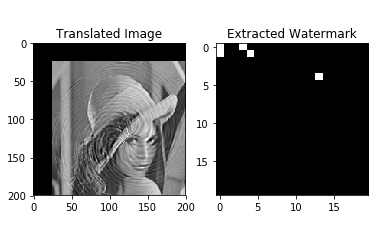

BE  :  279.0
BER :  69.75%


In [15]:
# Attack: Translation 12.5% X 12.5% Y
IMG_TRANSLATION = np.zeros((N,N), dtype='complex128')
IMG_TRANSLATION[25:200, 25:200] = IMG_WATERMARKED[0:175, 0:175]

(C_DIFF_TRANSLATION, BE_TRANSLATION, BER_TRANSLATION) = processAttack(IMG_TRANSLATION)

# Show Container
imshow2(IMG_TRANSLATION, C_DIFF_TRANSLATION, 'Translated Image', 'Extracted Watermark')

# Show Bit Error Rate
print('BE  : ', BE_TRANSLATION)
print('BER : ', '{:.2%}'.format(BER_TRANSLATION))

Progress: [####################] 100.0%


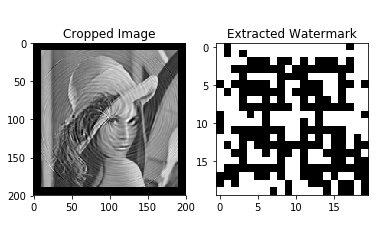

BE  :  77.0
BER :  19.25%


In [16]:
# Attack: FRAME 5%
IMG_CROP = np.copy(IMG_WATERMARKED)
IMG_CROP[0:10,:] = 0
IMG_CROP[:,0:10] = 0
IMG_CROP[190:200,:] = 0
IMG_CROP[:,190:200] = 0

(C_DIFF_CROP, BE_CROP, BER_CROP) = processAttack(IMG_CROP)

# Show Container
imshow2(IMG_CROP, C_DIFF_CROP, 'Cropped Image', 'Extracted Watermark')

# Show Bit Error Rate
print('BE  : ', BE_CROP)
print('BER : ', '{:.2%}'.format(BER_CROP))

Progress: [####################] 100.0%


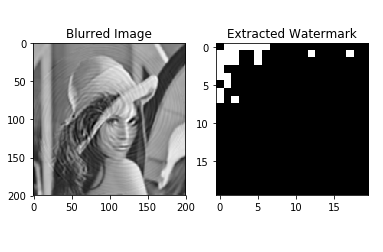

BE  :  261.0
BER :  65.25%


In [17]:
# Attack: BLUR 3x3
IMG_BLUR = cv2.blur(np.abs(IMG_WATERMARKED), (3,3))

(C_DIFF_BLUR, BE_BLUR, BER_BLUR) = processAttack(IMG_BLUR)

# Show Container
imshow2(IMG_BLUR, C_DIFF_BLUR, 'Blurred Image', 'Extracted Watermark')

# Show Bit Error Rate
print('BE  : ', BE_BLUR)
print('BER : ', '{:.2%}'.format(BER_BLUR))

Progress: [####################] 100.0%


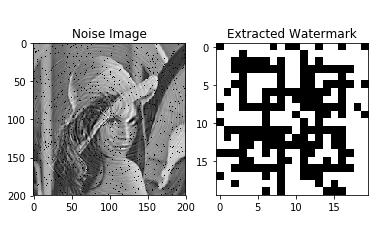

BE  :  59.0
BER :  14.75%


In [18]:
# Attack: RANDOM NOISE 3%
IMG_NOISE = np.copy(IMG_WATERMARKED)
for i, row in enumerate(IMG_NOISE):
    for j, val in enumerate(row):
        if(np.random.randint(low=0, high=100) < 3):
            IMG_NOISE[i,j] = 0

(C_DIFF_NOISE, BE_NOISE, BER_NOISE) = processAttack(IMG_NOISE)

# Show Container
imshow2(IMG_NOISE, C_DIFF_NOISE, 'Noise Image', 'Extracted Watermark')

# Show Bit Error Rate
print('BE  : ', BE_NOISE)
print('BER : ', '{:.2%}'.format(BER_NOISE))